In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from statistics import mean
import sklearn.metrics as metrics
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

In [3]:
data = pd.read_csv("/Users/gustavosganzerla/Documents/arp/classification/promoters_vs_shuffled.csv")

In [4]:
X = data.drop('label', axis=1)
y = data['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

kfold = KFold(n_splits=10, shuffle=True)

In [13]:
clf = svm.SVC(kernel='rbf')
kfold = KFold(n_splits=10, shuffle=True)
fold_no = 1
accuracy_list = []
for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)
    #metrics.plot_roc_curve(clf, testX, testY)
    
    name="ROC fold {}".format(fold_no)
    
    accuracy_list.append(metrics.accuracy_score(testY, y_pred))



In [14]:
accuracy_list

[0.8781725888324873,
 0.8614993646759848,
 0.8729351969504447,
 0.8589580686149937,
 0.866581956797967,
 0.8513341804320204,
 0.8500635324015248,
 0.8462515883100381,
 0.8678526048284625,
 0.8564167725540025]

In [40]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Accuracy: 0.8526048284625158


In [41]:
mean(accuracy_list)

0.8579618676591051

/Users/gustavosganzerla/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


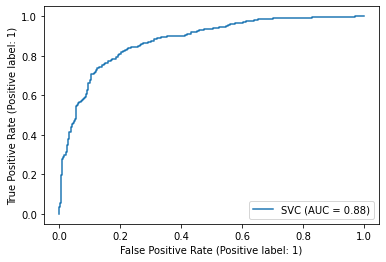

In [14]:
metrics.plot_roc_curve(clf, testX, testY)

In [6]:
import shap

In [7]:
X_PCA_promoters = X.loc[[4217 , 4497 , 5562 , 5206 , 4088 , 4324 , 5123 , 4539 , 5148 , 4169 , 4766 , 4822 , 4751 , 4770
                    , 4896 , 4228 , 4694 , 4793 , 4843 , 5103 , 4956 , 4777 , 4483 , 4067 , 4117 , 4812 , 4860 , 4382
                    , 7098 , 4356 , 5222 , 4083 , 4333 , 4772 , 4161 , 7250 , 4239 , 4885 , 4644 , 4704]]

X_PCA_non_promoters = X.loc[[1559 ,3430 ,3242 ,639  ,3589 ,2287 ,2322 ,3192 ,3358 ,2941 ,342  ,454  ,3706 ,671, 
                        2870 ,2200 ,3931 ,2567 ,2904 ,53   ,1529 ,1309 ,3764 ,2488 ,1819 ,2540 ,944  ,2210,
                        2114 ,201  ,182  ,2673 ,1702 ,2928 ,2509 ,843  ,1166 ,2906 ,1939 ,3935]]

In [8]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [97]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

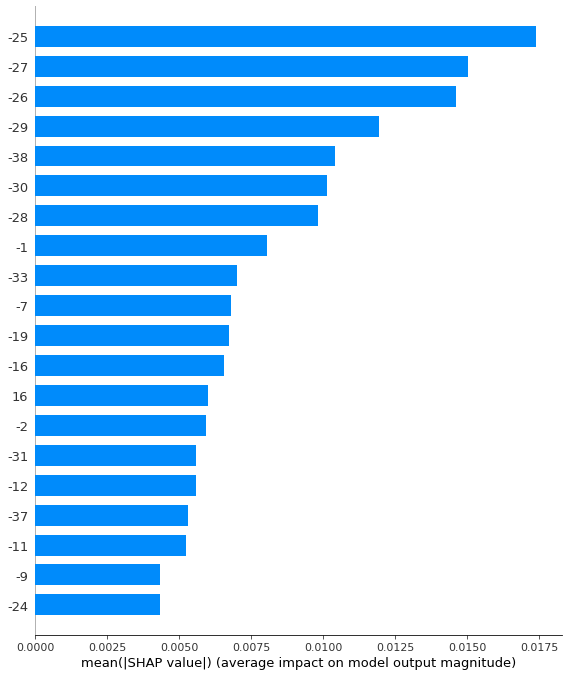

In [90]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

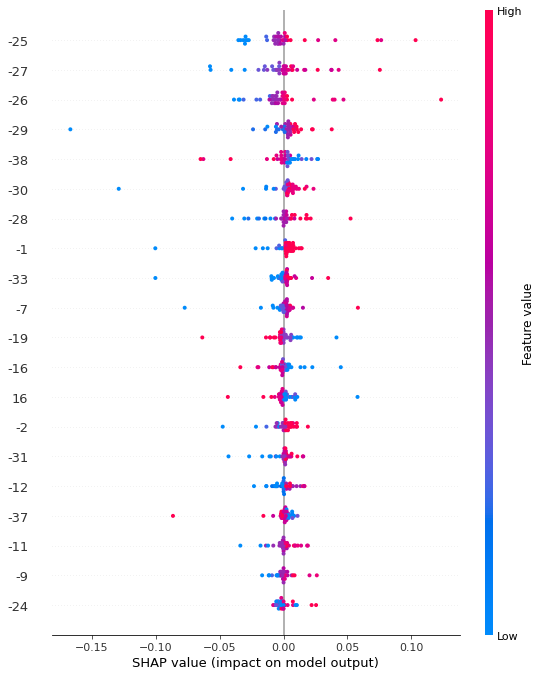

In [91]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

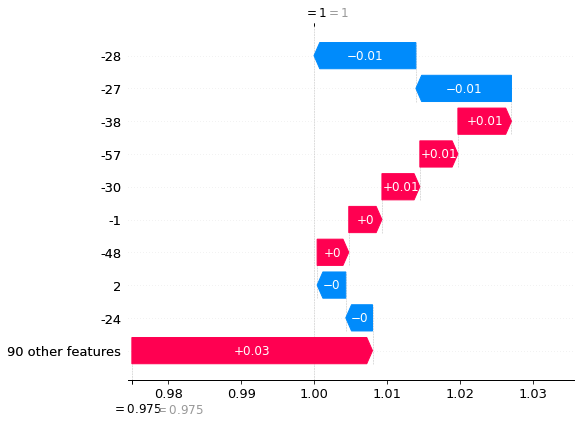

In [25]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [33]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [32]:
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

In [13]:
a_hospitalis = pd.read_csv("/Users/gustavosganzerla/Documents/arp/sequences/rsat_upstream_sequences/core_promoters/physical_analysis/lines/line_stability_acidianus_hospitalis.csv", header = None)
a_hospitalis

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,-1.84,-1.45,-1.30,-1.30,-1.45,-1.45,-1.30,-1.84,-1.84,-1.30,...,-1.84,-1.44,-1.44,-1.30,-0.88,-1.00,-1.44,-1.30,-1.00,-1.00
1,-1.00,-0.88,-0.58,-1.00,-1.30,-1.44,-0.58,-1.45,-1.45,-1.30,...,-1.00,-1.00,-0.88,-0.58,-1.45,-1.28,-1.00,-1.00,-1.00,-1.00
2,-0.58,-0.88,-0.58,-0.88,-1.44,-2.27,-1.28,-1.44,-1.30,-1.00,...,-1.30,-1.44,-1.44,-1.30,-0.88,-1.00,-1.00,-0.58,-0.88,-0.58
3,-0.58,-0.88,-1.00,-1.44,-1.84,-1.30,-1.30,-1.30,-1.30,-2.27,...,-1.00,-1.00,-0.88,-0.58,-1.00,-1.00,-1.00,-1.00,-0.88,-0.58
4,-1.00,-1.30,-1.30,-1.30,-1.30,-0.88,-0.58,-0.88,-1.00,-1.44,...,-0.88,-0.58,-1.00,-0.88,-0.58,-1.00,-1.00,-1.00,-0.88,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,-1.30,-1.00,-0.88,-1.44,-1.30,-0.88,-1.00,-0.58,-1.00,-1.00,...,-1.84,-2.27,-1.28,-1.00,-1.00,-0.58,-1.30,-1.84,-1.44,-0.58
2483,-1.45,-2.24,-1.44,-1.00,-0.58,-1.00,-0.88,-1.00,-0.58,-0.88,...,-1.45,-1.00,-1.00,-1.00,-1.00,-0.88,-0.58,-0.88,-1.00,-1.00
2484,-0.88,-1.00,-0.58,-0.88,-0.58,-1.00,-1.00,-1.30,-1.44,-0.58,...,-0.58,-1.45,-1.28,-0.58,-1.30,-1.44,-0.58,-1.00,-0.88,-0.58
2485,-0.88,-1.00,-0.58,-1.45,-1.28,-0.58,-1.30,-1.44,-0.58,-0.88,...,-1.45,-1.28,-1.00,-1.00,-0.58,-0.88,-0.58,-1.00,-0.88,-1.00


In [14]:
pred_test = clf.predict(a_hospitalis)
np.savetxt("/Users/gustavosganzerla/Documents/arp/list_text.txt", pred_test, delimiter=",")

In [57]:
###first I need to convert the line .txt to a .csv
path = "/Users/gustavosganzerla/Documents/arp/sequences/rsat_upstream_sequences/core_promoters/physical_analysis/lines/"
path_out = "/Users/gustavosganzerla/Documents/arp/sequences/rsat_upstream_sequences/core_promoters/csvs/"

filenames = os.listdir(path)

for item in filenames:
    if '.txt' in item:
        file = pd.read_csv(path+item)
        file.to_csv(path_out+item+".csv", index = None)
        

In [83]:
###read the csv and use it to predict the SVM model
path = "/Users/gustavosganzerla/Documents/arp/sequences/rsat_upstream_sequences/core_promoters/csvs/"
path_out  = "/Users/gustavosganzerla/Documents/arp/sequences/rsat_upstream_sequences/core_promoters/promoters_list/"

filenames = os.listdir(path)

for item in filenames:
    if '.csv' in item:
        
        validation = pd.read_csv(path+item, header = None, sep="\t")
        validation = validation.drop(99, axis=1)
        validation = validation.dropna()
        pred_validation = clf.predict(validation)

        
        np.savetxt(path_out+item, pred_validation, delimiter=",")
       